# Practicing the Python .plot() API standard on Pandas library
### Running off preliminary commits to [nu_open_policing](https://github.com/ACiDS-NU/nu_open_policing) by [Matt Kirschner](https://github.com/kirschner21)

# Import libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')
%matplotlib inline 
# iPython magic, only works in Jupyter / iPython

# Read IL-clean.csv with Pandas

In [2]:
full=pd.read_csv('IL-clean.csv',low_memory=False)
full.head() #Note the nice CSS rendering of Panda DataFrames in notebook 

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,NaN,NaN,17,Illinois State Police,F,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Olds 2000,NaN,ILLINOIS STATE POLICE 17
1,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,NaN,NaN,07,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Linc 1990,NaN,ILLINOIS STATE POLICE 07
2,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,NaN,NaN,11,Illinois State Police,M,...,False,NaN,NaN,False,Citation,NaN,NaN,Chev 1996,NaN,ILLINOIS STATE POLICE 11
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,Cook County,17031.0,03,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Buic 1992,NaN,ILLINOIS STATE POLICE 03
4,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,NaN,NaN,09,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Olds 1996,NaN,ILLINOIS STATE POLICE 09


# Tabulated data has 26 columns

In [3]:
full.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'vehicle_type', 'drugs_related_stop',
       'district'],
      dtype='object')

# Summarize Data
Note: $\text{'hit' rate} = \frac{\text{number of times contraband found}}{\text{numer of searches conducted}}$

In [5]:
def SummaryStats(df, label):
    """
    Sums searches, stops, and hits + calcs search rate in df; 
    returns a single row data frame with 'label' as index
    """
    n_stops = df.shape[0]
    n_searches = df['search_conducted'].sum()
    n_hits = df['contraband_found'].sum()
    search_rate = n_searches / n_stops
    hit_rate = n_hits / n_searches
    td = {'n_stops' : n_stops,
          'n_searches' : n_searches,
          'n_hits' : n_hits,
          'search_rate' : search_rate,
          'hit_rate' : hit_rate}
    return pd.DataFrame(data=td,index=[label])


# Summarize by race

In [119]:
SummarizedStops = SummaryStats(full, 'AllStops')

for race in full['driver_race'].unique():
    temp = SummaryStats(full[full['driver_race'] == race], race + 'Stops')
    SummarizedStops = SummarizedStops.append(temp)

SummarizedStops

,n_stops,n_searches,n_hits,search_rate,hit_rate
AllStops,4715031,188728,38733,0.040027,0.205232
WhiteStops,3437483,89166,21865,0.025939,0.245217
BlackStops,796114,64810,12507,0.081408,0.192979
HispanicStops,360294,31877,3977,0.088475,0.124761
AsianStops,111758,2562,339,0.022925,0.132319
OtherStops,9382,313,45,0.033362,0.143770


In [7]:
# This is a slow cell to run, it totals race hit rate by policing district
LocationStops = SummaryStats(full,'Total')
LocationStops['race'] = 'All'
LocationStops['location'] = 'All'
LocationStops['White_hit_rate'] = SummarizedStops.loc['WhiteStops']['hit_rate']
LocationStops['White_search_rate'] = SummarizedStops.loc['WhiteStops']['search_rate']

for district in full['district'].unique():
    if not isinstance(district, str):
        continue
    tempwhite = SummaryStats(full[(full['driver_race'] == 'White') & 
                                  (full['district'] == district)],
                             'White' + ' in ' + district)
    whitehit = tempwhite.get_value('White' + ' in ' + district, 'hit_rate')
    whitesearch = tempwhite.get_value('White' + ' in ' + district, 'search_rate')
    for race in full['driver_race'].unique():        
        if race == 'White':
            temp = tempwhite
        elif race == 'Other':
            continue
        else: 
            temp = SummaryStats(full[(full['driver_race'] == race) &
                                   (full['district'] == district)],
                              race + ' in ' + district)
        temp['race'] = race
        temp['location'] = district
        temp['White_hit_rate'] = whitehit
        temp['White_search_rate'] = whitesearch
        LocationStops = LocationStops.append(temp)

C:\Users\Jordan\Miniconda3\envs\dotplot\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Jordan\Miniconda3\envs\dotplot\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Jordan\Miniconda3\envs\dotplot\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


# Group by Race

In [96]:
ByRace = LocationStops.groupby('race')
print(ByRace.describe(include = [np.number]).columns.levels[0])
print('# of Stops')
ByRace.describe(include = [np.number]).n_stops.drop(index='All', columns='count')

Index(['White_hit_rate', 'White_search_rate', 'hit_rate', 'n_hits',
       'n_searches', 'n_stops', 'search_rate'],
      dtype='object')
# of Stops


,mean,std,min,25%,50%,75%,max
race,,,,,,,
Asian,4656.083333,6315.054228,9.0,1511.25,2722.5,4897.00,29148.0
Black,33170.625000,44125.297090,152.0,7957.50,22908.5,36202.50,201600.0
Hispanic,15009.833333,23395.216521,69.0,3445.75,8431.5,10972.25,91312.0
White,143221.166667,94379.107666,216.0,111217.25,137700.5,176226.75,483157.0


# Visualizating data, plotting
## Matplotlib from Scratch (in sub-slide)

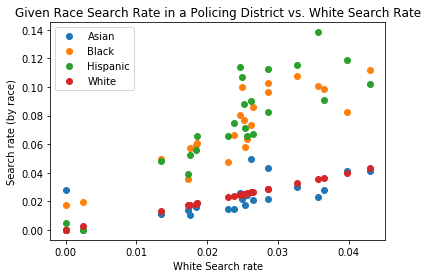

In [169]:
fig, ax = plt.subplots()
for name, group in ByRace:
    if name != 'All':
        ax.plot(group.White_search_rate, group.search_rate,
                marker = 'o', linestyle = '', label = name)

ax.legend()
ax.set_xlabel("White Search rate")
ax.set_ylabel("Search rate (by race)")
ax.set_title("Given Race Search Rate in a Policing District vs. White Search Rate")
plt.show() #suppresses <matplotlib...> output (from ax.legend() for ex.)

... Hope you're not missing the sub-context here:<br>
**White, Asian people get searched less often by police in traffice stops**

# Pandas [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) functionality
## 'de-facto standard for 2D charts'

In [129]:
name_list = []
group_list = []
for name, group in ByRace:
    if name!= 'All':
        name_list.append(name)
        group_list.append(group)

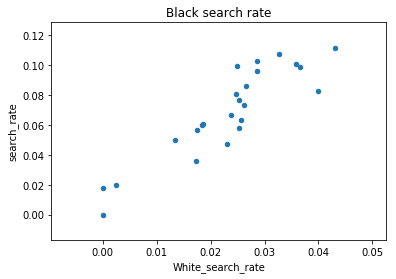

In [156]:
index = 1
group_list[index].plot(x = 'White_search_rate',
                       y = 'search_rate',
                       kind = 'scatter',
                       title = name_list[index] + ' search rate')
plt.show()

Note axes are automatically labeled<br>
In general, fast and easy to explore correlation in DataFrame

You can even do some cool stuff with color/colorbars in the blink of an eye<br>
Note: using [DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html) here to skip verbose
```python
kind = 'scatter'
```

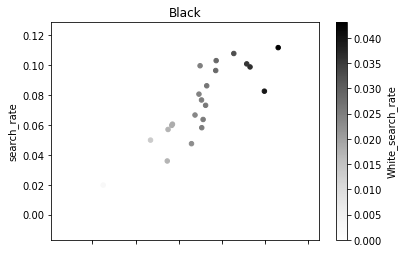

In [158]:
index = 1
group_list[index].plot.scatter(x = 'White_search_rate',
                               y = 'search_rate',
                               c = 'White_search_rate', 
                               title = name_list[index])
plt.show()

Looking at a plot like this, realize the x data could be encoded on colorbar <br>
--> probably more elegant that search rate should just be in units of `white_search_rate`, and then just have a y axis and colorbar of `search_rate/white_search_rate`
¯\ _ (ツ) _ /¯

# ... Again, though, this is best for 2D charts
Left a blank code block here to try to recreate Matt's multi-scatter plot above with DataFrame.plot<br>
(Answer on the next subslide)

In [159]:
# Note: You can edit this cell even in presentation mode and run with {'shift' + 'enter'}

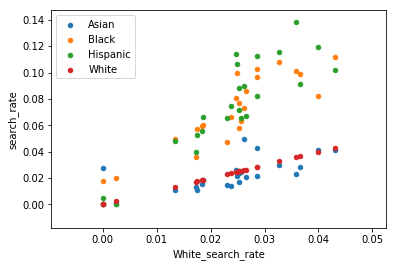

In [165]:
prop_cycle = plt.rcParams['axes.prop_cycle'] 
colors = prop_cycle.by_key()['color']
#^^from https://matplotlib.org/2.1.1/gallery/color/color_cycle_default.html

ax1 = group_list[0].plot.scatter(x = 'White_search_rate', y = 'search_rate')
for i in range(1, len(group_list)):
    group_list[i].plot.scatter(x = 'White_search_rate', 
                               y = 'search_rate', 
                               color = colors[i], 
                               ax = ax1, #here is the key fix 
                               legend = True)
    ax1.legend(name_list)

# What about Plotly, Vega-Lite, Bokeh, etc?
Same, same (protocol), but different<br>
First, here's a figure to orient you in the Python visualizatoin world<br>
<img src="image.png" alt="A Map of Visualization in Python in 2018" width="600"/>

And here's a matplotlib plot, again, but of 'hit' rate instead, <br> because y'know *"maybe there are just less white people getting searched?"*

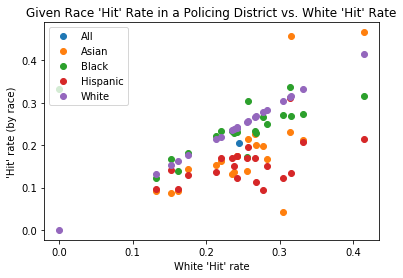

In [172]:
fig, ax = plt.subplots()
for name, group in ByRace:
    ax.plot(group.White_hit_rate,
            group.hit_rate,
            marker = 'o',
            linestyle = '',
            label = name)

ax.legend(loc = 'upper left')
ax.set_xlabel("White 'Hit' rate")
ax.set_ylabel("'Hit' rate (by race)")
ax.set_title("Given Race 'Hit' Rate in a Policing District vs. White 'Hit' Rate")
plt.show()

# Vega-lite on a DataFrame with [pdvega](https://altair-viz.github.io/pdvega/)
"When working with data, one of the biggest challenges is ensuring reproducibility of results. When you create a figure and export it to PNG or PDF, the data become baked-in to the rendering in a way that is difficult or impossible for others to extract. Vega and Vega-Lite change this: instead of packaging a figure by encoding its pixel values, they package a figure by describing, in a declarative manner, the relationship between data values and visual encodings through a JSON specification. This means that the Vega-Lite figures produced by pdvega are portable: you can send someone the resulting JSON specification and they can choose whether to render it interactively online, convert it to a PNG or EPS for static publication, or even enhance and extend the figure to learn more about the data."

**tl; dr** *Vega visuals are in JSON; JSON is more portable (JSON == (python) dictionary)*

# Here's the sticking point: 
If you understand the `DataFrame.plot` demo above, you already know how to use `pdvega`

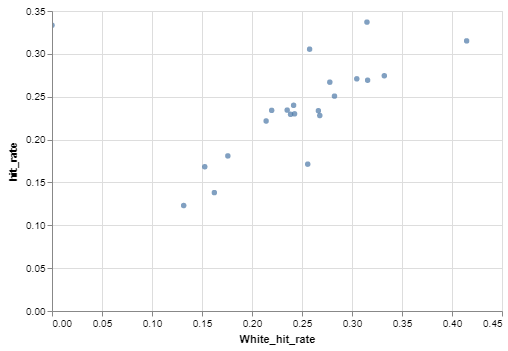

In [175]:
import pdvega  # import adds vgplot attribute to pandas
index = 1
group_list[index].vgplot.scatter(x = 'White_hit_rate',
                               y = 'hit_rate', 
                               title = name_list[index])

^^This is even cooler for data exploration

Sadly, I cannot get `vgplot` to stack scatter plots on top of each other<br>
You can however, 
```python 
from pdvega import Axes
```
which, may start to show you the [verbose](https://altair-viz.github.io/pdvega/advanced.html) syntax to encode JSON images (even in this 'lite form); this is why pdvega is *so* nice

# cufflinks, hvPlot, and beyond
The `dotplot.yml` environment file in this repo provides the variables to run [cufflinks](https://plot.ly/ipython-notebooks/cufflinks/#dataframes) and [hvPlot](https://hvplot.pyviz.org/user_guide/Plotting.html) libraries, giving access to DataFrame.plot-like API for [Plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/) (both are JavaScript-based). <br>

"hvPlot also provides the same plotting API for many other data libraries (xarray, GeoPandas, Dask, Intake, Streamz)"<br>

Please toy around with these if you have time--first on my list is GeoPandas since policing precinct is encoded in this data and might make for a great [mapped](http://geopandas.org/mapping.html) plot

# Below is some additional analysis of the data

In [11]:
LocationStops['diff_hit_rate']=LocationStops['hit_rate']/LocationStops['White_hit_rate']
LocationStops['diff_search_rate']=LocationStops['search_rate']/LocationStops['White_search_rate']

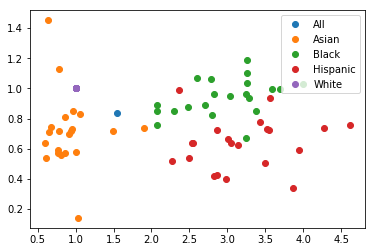

In [12]:
fig, ax = plt.subplots()
for name, group in ByRace:
    ax.plot(group.diff_search_rate, group.diff_hit_rate, marker='o',linestyle='',label=name)
    
ax.legend()

In [13]:
LocationStops

,hit_rate,n_hits,n_searches,n_stops,search_rate,race,location,White_hit_rate,White_search_rate,diff_hit_rate,diff_search_rate
Total,0.205232,38733,188728,4715031,0.040027,All,All,0.245217,0.025939,0.836941,1.543096
White in ILLINOIS STATE POLICE 17,0.241595,733,3034,105809,0.028674,White,ILLINOIS STATE POLICE 17,0.241595,0.028674,1.000000,1.000000
Black in ILLINOIS STATE POLICE 17,0.240000,294,1225,11890,0.103028,Black,ILLINOIS STATE POLICE 17,0.241595,0.028674,0.993397,3.593034
Hispanic in ILLINOIS STATE POLICE 17,0.175676,130,740,9013,0.082104,Hispanic,ILLINOIS STATE POLICE 17,0.241595,0.028674,0.727149,2.863317
Asian in ILLINOIS STATE POLICE 17,0.173469,17,98,2280,0.042982,Asian,ILLINOIS STATE POLICE 17,0.241595,0.028674,0.718017,1.498988
White in ILLINOIS STATE POLICE 07,0.219691,839,3819,145611,0.026227,White,ILLINOIS STATE POLICE 07,0.219691,0.026227,1.000000,1.000000
Black in ILLINOIS STATE POLICE 07,0.234101,254,1085,14840,0.073113,Black,ILLINOIS STATE POLICE 07,0.219691,0.026227,1.065594,2.787664
Hispanic in ILLINOIS STATE POLICE 07,0.170762,139,814,9037,0.090074,Hispanic,ILLINOIS STATE POLICE 07,0.219691,0.026227,0.777281,3.434351
Asian in ILLINOIS STATE POLICE 07,0.161765,22,136,2733,0.049762,Asian,ILLINOIS STATE POLICE 07,0.219691,0.026227,0.736328,1.897334
White in ILLINOIS STATE POLICE 11,0.257607,1380,5357,216970,0.024690,White,ILLINOIS STATE POLICE 11,0.257607,0.024690,1.000000,1.000000
